### Importing Libraries

In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
pd.set_option("max_columns",500)

### Loading the dataset

In [443]:
df=pd.read_csv('./data/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Dropping the 'Unnamed:' column

In [444]:
df=df.iloc[:,1:]

### Checking the shape

In [445]:
df.shape

(1303, 11)

#### Dataset has 1303 rows and 11 columns

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


#### No Null values are present in the dataset
- [ Inches and Price ] are the only columns having float datatype rest are object

In [447]:
df.duplicated().sum()

29

#### 29 Duplicate values are present

### Droppping The Duplicates

In [448]:
df.drop_duplicates(inplace=True)

#### Cleaning Ram column : 8GB -> 8

In [449]:
df['Ram']=df['Ram'].str.replace('GB','').astype('int64')

#### Cleaning Weight Column : 1.86kg -> 1.86

In [450]:
df['Weight']=df['Weight'].str.replace('kg','').astype('float64')

## Univariate Analysis ( Price )

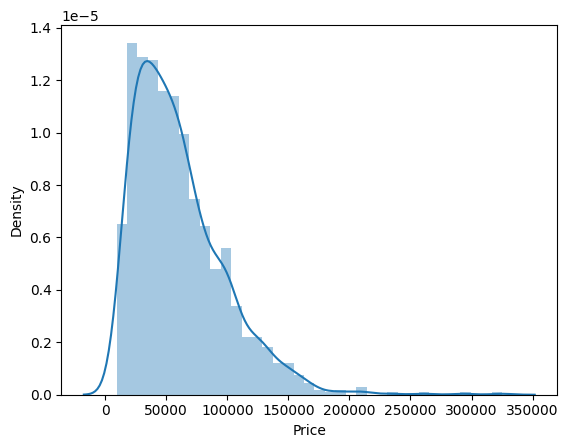

In [451]:
sns.distplot(df['Price'])
plt.show()

#### Distribution of the price is right skewed

### Univariate Analysis ( Company )

In [452]:
df['Company'].value_counts()/len(df)*100

Dell         22.841444
Lenovo       22.684458
HP           21.036107
Asus         11.852433
Acer          7.927786
MSI           4.238619
Toshiba       3.767661
Apple         1.648352
Samsung       0.706436
Razer         0.549451
Mediacom      0.549451
Microsoft     0.470958
Xiaomi        0.313972
Vero          0.313972
Chuwi         0.235479
Google        0.235479
Fujitsu       0.235479
LG            0.235479
Huawei        0.156986
Name: Company, dtype: float64

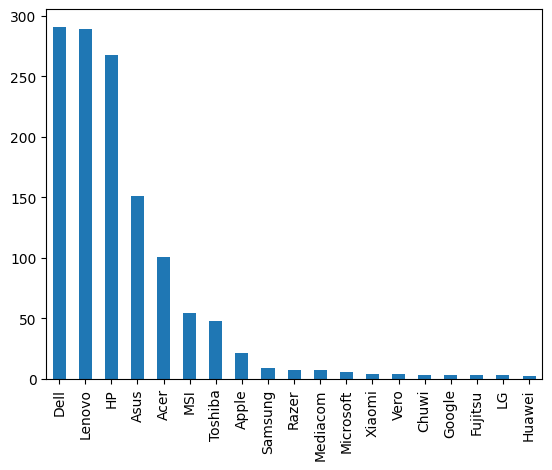

In [453]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

#### [Dell, Lenevo , HP , Asus , Acer] are some of the top companies present in the dataset

### Bivariate Analysis ( Company and Sales )

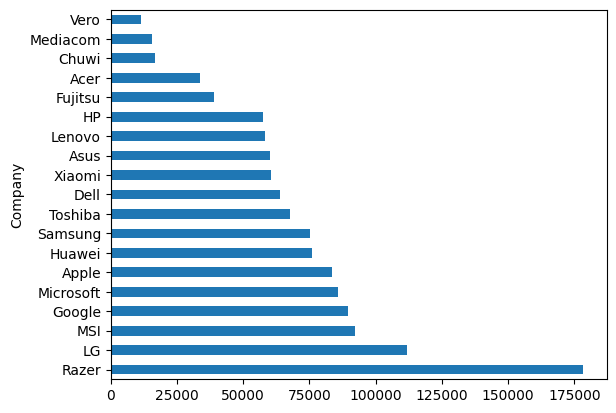

In [454]:
df.groupby("Company")['Price'].mean().sort_values(ascending=False).plot.barh()
plt.show()

- #### Razer has the highest mean Price of their laptops
- #### Brands in the budget section are [HP , LENEVO , ASUS , XIAOMI , DELL]

### Univariate Analysis ( TypeName )

In [455]:
df['TypeName'].value_counts()/len(df)*100

Notebook              55.416013
Gaming                16.091052
Ultrabook             15.227630
2 in 1 Convertible     9.183673
Workstation            2.276295
Netbook                1.805338
Name: TypeName, dtype: float64

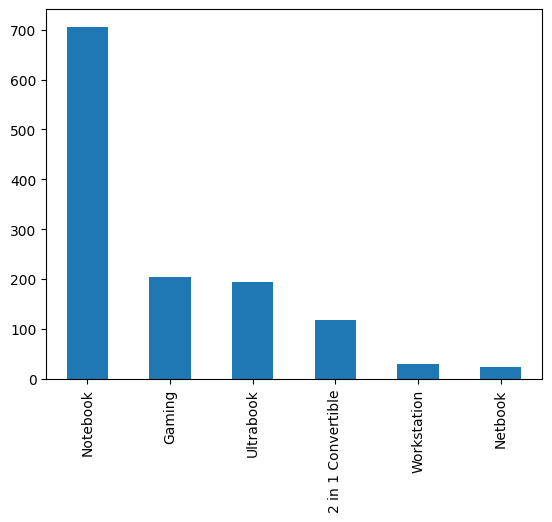

In [456]:
df['TypeName'].value_counts().plot.bar()
plt.show()

- #### Notebooks are dominating the category segment with a selling rate of 55.41% [ this category of laptop is being purchashed the most]

### Bivariate Analysis (TypeName and Price)

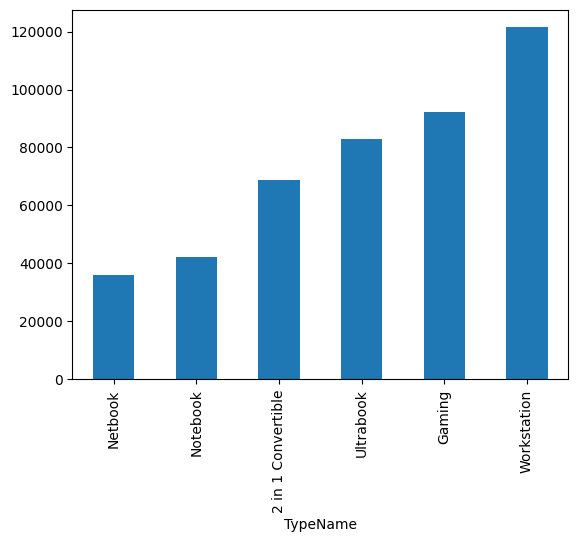

In [457]:
df.groupby('TypeName')['Price'].mean().sort_values().plot.bar()
plt.show()

- #### Notebooks Falls in the budget range [ Clarifies why they are being purchased the most]
- #### Netbook are the inexpensive ones
- #### Workstation are the most expensive there avg price is above 1 lakh 

### Univarite analysis (Inches)

In [458]:
df['Inches'].value_counts()/len(df)*100

15.6    50.706436
14.0    15.149137
17.3    12.872841
13.3    12.558870
12.5     3.061224
11.6     2.433281
12.0     0.470958
13.5     0.470958
13.9     0.470958
12.3     0.392465
10.1     0.313972
15.4     0.313972
15.0     0.313972
13.0     0.156986
18.4     0.078493
17.0     0.078493
14.1     0.078493
11.3     0.078493
Name: Inches, dtype: float64

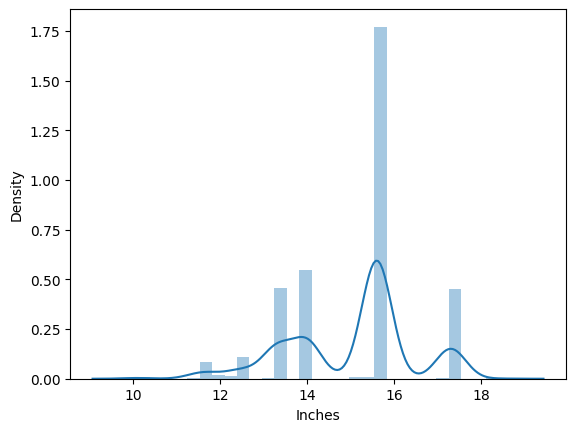

In [459]:
sns.distplot(df['Inches'])
plt.show()

- #### Most selling laptops are of 15.6 screen size
- #### Second most are 14.0 inches screen size

### Bivariate Analysis (Inches and Price)

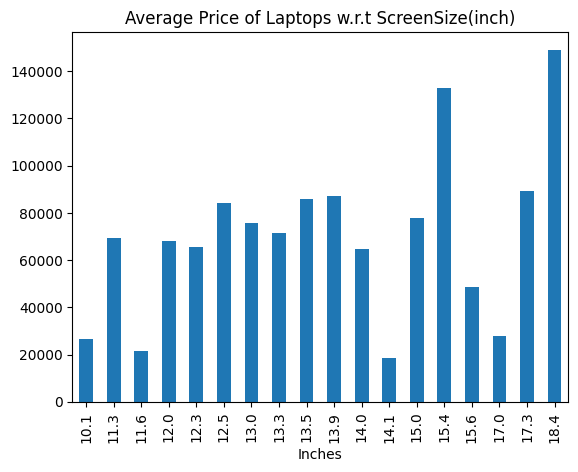

In [460]:
df.groupby('Inches')['Price'].mean().plot.bar()
plt.title("Average Price of Laptops w.r.t ScreenSize(inch)")
plt.show()

- #### this plot verifies the reason for most selling laptops of screensize [14.0 and 15.6]
- #### because the price of these respective screen sizes comes in the budget range of the customer [45k ~ 60k]


## Feature Engineering (Feature Extraction)

In [461]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

#### This columns contains information about
- having touchscreen
- having IPS PANEL
- Resolution X
- Resolution Y

### Multiple Columns can be Extracted from this feature

### Extracting and making new column  [***Touchscreen***] from ScreenResolution

In [462]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [463]:
df['Touchscreen'].value_counts()/len(df)*100

0    85.243328
1    14.756672
Name: Touchscreen, dtype: float64

### Univariate Analysis ( Touchscreen )

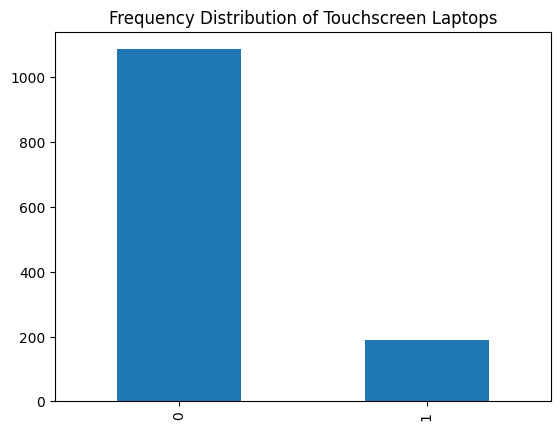

In [464]:
df['Touchscreen'].value_counts().plot.bar()
plt.title(f"Frequency Distribution of Touchscreen Laptops")
plt.show()

- #### Laptops Not having touchscreen are selling at a booming rate 85.24% while laptops having touchscreen have a selling rate of 14.7% according to the data

### Bivariate Analysis ( Touchscreen and Price )

In [465]:
df.groupby('Touchscreen')['Price'].mean()

Touchscreen
0    57574.306674
1    77422.131574
Name: Price, dtype: float64

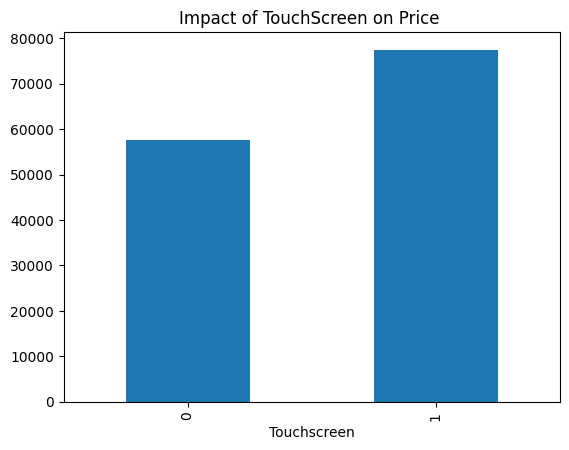

In [466]:
df.groupby('Touchscreen')['Price'].mean().plot.bar()
plt.title('Impact of TouchScreen on Price ')
plt.show()

- #### Average Price of a Touchscreen laptop is approx 77k while a simple laptop has 58k
- #### Laptops with touchscreen are having higher avg Price
- #### this again verifies why touchscreen laptops have low selling rate ..this is because they have higher avg price 

### Extracting and making new column ***isIPS*** from ScreenResolution

In [467]:
df['isIPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

In [468]:
df['isIPS'].value_counts()/len(df)*100

0    71.978022
1    28.021978
Name: isIPS, dtype: float64

### Univariate Analysis ( isIPS )

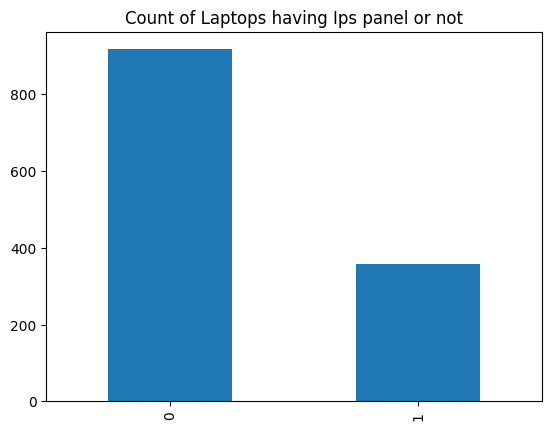

In [469]:
df['isIPS'].value_counts().plot.bar()
plt.title('Count of Laptops having Ips panel or not')
plt.show()

- #### Laptops not having IPS panel has a higher selling rate of 71.97%
- #### Laptops not haivng IPS panel has a selling rate of 28.02% which is lower

### Bivariate Analysis ( isIPS and Price )

In [470]:
df.groupby('isIPS')['Price'].mean()

isIPS
0    54673.631074
1    75477.137506
Name: Price, dtype: float64

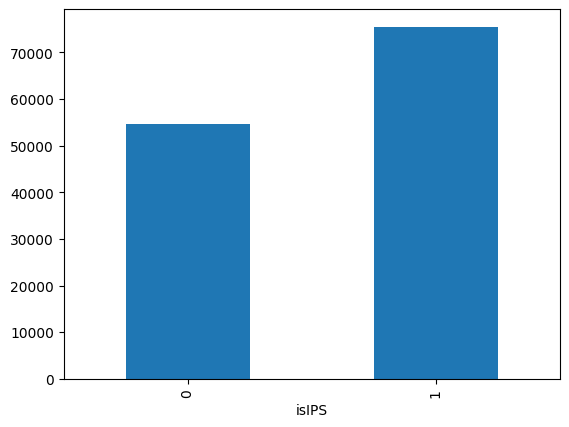

In [471]:
df.groupby('isIPS')['Price'].mean().plot.bar()
plt.show()

- #### Laptops having Ips panel seems to have higher avg Price
- #### Without IPS PANEL avg price is 55k
- #### With IPS PANEL avg price is 76k
- #### despite having a higher average price ..laptops with Ips panel has a selling rate of 28% which is comparatively higher...
- #### this somehow shows that customers are less likely to compromise with IPS panel displays

### Extracting and making new columns [***ResolutionX*** and ***ResolutionY*** ] from ScreenResolution

In [472]:
temp=df['ScreenResolution'].str.split('x',n=1,expand=True)
temp

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1269,1366,768
1270,IPS Panel Full HD / Touchscreen 1920,1080
1271,IPS Panel Quad HD+ / Touchscreen 3200,1800
1272,1366,768


In [473]:
df['X_res']=temp[0].apply(lambda x:x.split()[-1]).astype('int64')
df['Y_res']=temp[1].astype('int64')

In [474]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,isIPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


### Checking Correlation w.r.t to Price


In [475]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
isIPS          0.250358
X_res          0.552074
Y_res          0.548111
Name: Price, dtype: float64

### Observations
- #### Inches has a very low or almost no correaltion with Price( target ) [ it is not contributing in the variance of Price]
- #### X_res and y_res is nearly having 0.50 correlation with Price

### Calculating PPI( PIXELS PER iNCHES )


In [476]:
df['ppi']=(((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float64')

In [477]:
df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
isIPS          0.250358
X_res          0.552074
Y_res          0.548111
ppi            0.469539
Name: Price, dtype: float64

- #### ppi is having a descent correlation with Price columns
- #### as now X_res,y_res and inches have been to calculate ppi
- #### next steps will be to drop these columns

### Dropping [ ScreenResolution , X_res , Y_res , Inches] column

In [478]:
df.drop(columns=['ScreenResolution','X_res','Y_res','Inches'],inplace=True,axis=1)

In [479]:
k=df['Cpu'].value_counts()

for i in k:
    print(f'{k[k==i].index[0]}   ------------   {i}           -------------          [ {i/len(df)*100} % ]')
print(f"Unique Number of Catagories are : {len(k)}")

Intel Core i5 7200U 2.5GHz   ------------   190           -------------          [ 14.91365777080063 % ]
Intel Core i7 7700HQ 2.8GHz   ------------   146           -------------          [ 11.459968602825747 % ]
Intel Core i7 7500U 2.7GHz   ------------   132           -------------          [ 10.361067503924646 % ]
Intel Core i7 8550U 1.8GHz   ------------   73           -------------          [ 5.729984301412873 % ]
Intel Core i5 8250U 1.6GHz   ------------   72           -------------          [ 5.651491365777081 % ]
Intel Core i5 6200U 2.3GHz   ------------   68           -------------          [ 5.337519623233909 % ]
Intel Core i3 6006U 2GHz   ------------   64           -------------          [ 5.023547880690738 % ]
Intel Core i7 6500U 2.5GHz   ------------   41           -------------          [ 3.2182103610675044 % ]
Intel Core i7 6500U 2.5GHz   ------------   41           -------------          [ 3.2182103610675044 % ]
Intel Core i3 7100U 2.4GHz   ------------   35           -

- #### Cpu column is having the highest Cardinality [ it has 118 unique catagories of processors]
- #### with many categories having ratio below 0.08 which is very less 
- #### we will be selecting only the 5 catagories of processors

### Fetching only the first 3 words from Processors list

In [480]:
df['cpu_brand']=df['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

In [481]:
for i in df['cpu_brand'][:15]:
    print(i)

# fucnction to fetch 5 different types of processors
def fetch_processor(value):
    if value=='Intel Core i3' or value=='Intel Core i7' or value=='Intel Core i5':
        return value
    else:
        if value.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

Intel Core i5
Intel Core i5
Intel Core i5
Intel Core i7
Intel Core i5
AMD A9-Series 9420
Intel Core i7
Intel Core i5
Intel Core i7
Intel Core i5
Intel Core i5
Intel Core i3
Intel Core i7
Intel Core i3
Intel Core M


In [482]:
df['cpu_brand']=df['cpu_brand'].apply(fetch_processor)
df['cpu_brand']

0               Intel Core i5
1               Intel Core i5
2               Intel Core i5
3               Intel Core i7
4               Intel Core i5
                ...          
1269            Intel Core i7
1270            Intel Core i7
1271            Intel Core i7
1272    Other Intel Processor
1273            Intel Core i7
Name: cpu_brand, Length: 1274, dtype: object

#### Univariate analysis ( cpu_brand )

In [483]:
df['cpu_brand'].value_counts()/len(df)*100

Intel Core i7            40.423862
Intel Core i5            33.202512
Other Intel Processor    11.067504
Intel Core i3            10.518053
AMD Processor             4.788069
Name: cpu_brand, dtype: float64

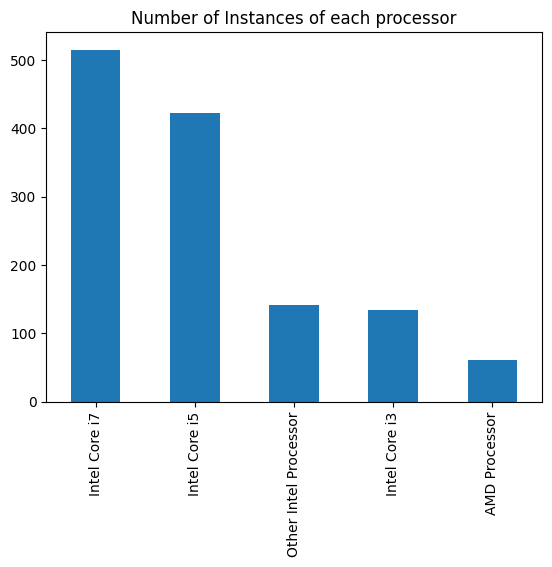

In [484]:
df['cpu_brand'].value_counts().plot.bar()
plt.title("Number of Instances of each processor")
plt.show()

- ### Selling Rates
- #### intel core i7 : 40.42%
- #### intel core i5 : 33.20%
- #### intel core i3 : 10%
- #### Other Intel Processor : 11.06%
- #### amd processor : 4.7%

- #### Intel core i7 has the highest selling rate and it is dominating the category 

### Bivariate Analysis ( cpu_brand  - Price )

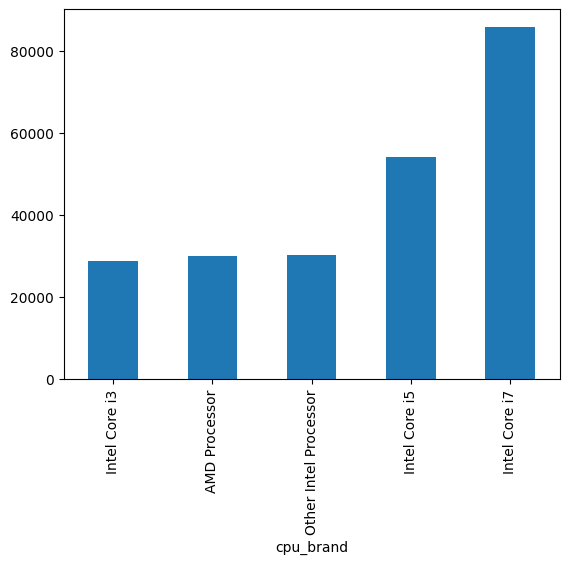

In [485]:
df.groupby('cpu_brand')['Price'].mean().sort_values().plot.bar()
plt.show()

- #### Laptops with INTEL CORE i7 goes above an average of 80k but it still holds the highest selling rate 
- #### this tells us that customers are not likely to compromise with the Processor/Cpu or performance of the laptop even if it is having a higher price

### Dropping the Cpu column

In [486]:
df.drop(columns='Cpu',inplace=True)

### Univariate Analysis ( Ram )

In [487]:
df['Ram'].value_counts()/len(df)*100

8     48.116170
4     28.728414
16    15.541601
6      2.747253
12     1.962323
32     1.334380
2      1.255887
24     0.235479
64     0.078493
Name: Ram, dtype: float64

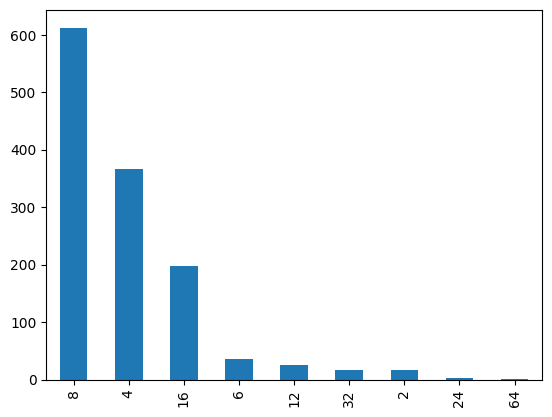

In [488]:
df['Ram'].value_counts().plot.bar()
plt.show()

- #### 8gb ram has the highest selling rate 48.11%

### Bivariate Analysis ( Ram - Price )

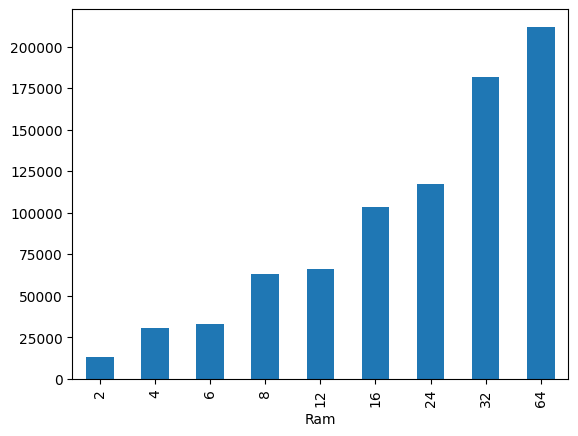

In [489]:
df.groupby('Ram')['Price'].mean().sort_values().plot.bar()
plt.show()

- #### this plot verifies why 8 gb ram has the highest selling rate
- #### as laptops equipped with 8gb ram falls in the range between (50k - 75k) which is considered to be a sweet budget spot for many customers
- #### also it shows a very strong linearity with Price column ...that is why it is having a much higher correlation coefficient with price

In [490]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

- #### this column contains information about
- SSD
- HDD
- HYBRID
- FLASH STORAGE

In [491]:
df[37:50]

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,isIPS,ppi,cpu_brand
37,Dell,Notebook,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,52161.1200,0,1,127.335675,Intel Core i5
38,HP,Notebook,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,26037.4032,0,0,100.454670,Intel Core i5
39,HP,Notebook,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.10,46833.1200,0,0,141.211998,Intel Core i5
40,Asus,Notebook,4,1TB HDD,Intel HD Graphics 620,Linux,2.00,20725.9200,0,0,141.211998,Intel Core i3
41,Dell,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,79866.7200,0,1,141.211998,Intel Core i7
42,Asus,Notebook,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.30,27864.9072,0,0,100.454670,Intel Core i5
43,Acer,Notebook,4,256GB SSD,Intel UHD Graphics 620,Windows 10,2.20,36336.9600,0,1,141.211998,Intel Core i5
44,Dell,2 in 1 Convertible,12,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53226.7200,1,0,127.335675,Intel Core i5
45,Apple,Ultrabook,8,256GB SSD,Intel Iris Graphics 540,macOS,1.37,75604.3200,0,1,226.983005,Intel Core i5
46,Lenovo,Notebook,4,128GB SSD,Intel HD Graphics 520,No OS,2.20,19660.3200,0,0,100.454670,Intel Core i3


### Defining Custom Function for cleaning column ***Memory*** and extracting 4 columns from it
- #### SSD
- #### HDD
- #### Hybrid
- #### Flash_Storage

- #### this function detects the individual value for having [ SSD , HDD , Flash_storage , Hybird , +] and treats them accordingly

### Memory Cleaner Function

In [492]:
ssd_values=[]
hdd_values=[]
flash_storage_values=[]
hybrid_values=[]
having_plus_values=[]

def memory_cleaner(value):

    if 'SSD' in value and '+' not in value:   #128GB SSD

        value=value.split()[0]                #128GB

        if 'TB' in value:                     #2TB -> 2000
            value=value.replace('TB','000')
        else:
            value=value.replace('GB','')      #128

        ssd_values.append(float(value))
        hdd_values.append(0)
        flash_storage_values.append(0)
        hybrid_values.append(0)
        

    elif 'HDD' in value and '+' not in value:   #500GB HDD

        value=value.split()[0]                   #500GB

        if 'TB' in value:     
            value=value.replace('TB','000')      # 2TB -> 2000
        else:
            value=value.replace('GB','')        #500

        ssd_values.append(0)
        hdd_values.append(float(value))
        flash_storage_values.append(0)
        hybrid_values.append(0)

    elif 'Flash Storage' in value and '+' not in value:   #128GB Flash Storage
        
        value=value.split()[0]                            #128GB

        if 'TB' in value:                                #2TB -> 2000
            value=value.replace('TB','000')
        else:                                            #128
            value=value.replace('GB','')
            
        ssd_values.append(0)
        hdd_values.append(0)
        flash_storage_values.append(float(value))
        hybrid_values.append(0)

    elif 'Hybrid' in value and '+' not in value:    #1.0TB Hybrid

        value=value.split()[0]                      #1.0TB
        if 'TB' in value:                           #1.0TB -> 1000
            value=value.replace('TB','000')
        else:
            value=value.replace('GB','')            #16GB -> 16
        
        ssd_values.append(0)
        hdd_values.append(0)
        flash_storage_values.append(0)
        hybrid_values.append(float(value))


    elif '+' in value:                             # 128GB SSD +  1TB HDD
                                             
        left_value,right_value=value.split('+')     # '128GB SSD ', '  1TB HDD'
        
        left_value_number=left_value.split()[0]
        left_value_type=left_value.split()[1]            #getting the type of memory
        
        right_value_number=right_value.split()[0]
        right_value_type=right_value.split()[1]

        #COMBINATION 1
        if left_value_type=='SSD' and right_value_type=='HDD':
            
            if 'TB' in left_value_number:
                left_value_number=left_value_number.replace('TB','000')
            else:
                left_value_number=left_value_number.replace("GB",'')
            
            if 'TB' in right_value_number:
                right_value_number=right_value_number.replace("TB",'000')
            else:
                right_value_number=right_value_number.replace('GB','')
            
            ssd_values.append(float(left_value_number))
            hdd_values.append(float(right_value_number))
            flash_storage_values.append(0)
            hybrid_values.append(0)

        # COMBINATION 2
        elif left_value_type=='SSD' and right_value_type=='SSD':
            
            if 'TB' in left_value_number:
                left_value_number=left_value_number.replace('TB','000')
            else:
                left_value_number=left_value_number.replace("GB",'')
            
            if 'TB' in right_value_number:
                right_value_number=right_value_number.replace("TB",'000')
            else:
                right_value_number=right_value_number.replace('GB','')
            
            ssd_values.append(float(left_value_number)+float(right_value_number))
            hdd_values.append(0)
            flash_storage_values.append(0)
            hybrid_values.append(0)

        # COMBINATION 3
        elif left_value_type=='Flash' and right_value_type=='HDD':
            
            if 'TB' in left_value_number:
                left_value_number=left_value_number.replace('TB','000')
            else:
                left_value_number=left_value_number.replace("GB",'')
            
            if 'TB' in right_value_number:
                right_value_number=right_value_number.replace("TB",'000')
            else:
                right_value_number=right_value_number.replace('GB','')
            
            ssd_values.append(0)
            hdd_values.append(float(right_value_number))
            flash_storage_values.append(float(left_value_number))
            hybrid_values.append(0)
        
        # COMBINATION 4
        elif left_value_type=='HDD' and right_value_type=='HDD':
            
            if 'TB' in left_value_number:
                left_value_number=left_value_number.replace('TB','000')
            else:
                left_value_number=left_value_number.replace("GB",'')
            
            if 'TB' in right_value_number:
                right_value_number=right_value_number.replace("TB",'000')
            else:
                right_value_number=right_value_number.replace('GB','')
            
            ssd_values.append(0)
            hdd_values.append(float(left_value_number)+float(right_value_number))
            flash_storage_values.append(0)
            hybrid_values.append(0)
        
        # COMBINATION 5
        elif left_value_type=='SSD' and right_value_type=='Hybrid':
            
            if 'TB' in left_value_number:
                left_value_number=left_value_number.replace('TB','000')
            else:
                left_value_number=left_value_number.replace("GB",'')
            
            if 'TB' in right_value_number:
                right_value_number=right_value_number.replace("TB",'000')
            else:
                right_value_number=right_value_number.replace('GB','')
            
            ssd_values.append(float(left_value_number))
            hdd_values.append(0)
            flash_storage_values.append(0)
            hybrid_values.append(float(right_value_number))

        having_plus_values.append([[left_value_number,left_value_type],[right_value_number,right_value_type]])

df['Memory'].apply(memory_cleaner)


df['SSD']=[int(i) for i in ssd_values]
df['HDD']=[int(i) for i in hdd_values]
df['Hybrid']=[int(i) for i in hybrid_values]
df['Flash_Storage']=[int(i) for i in flash_storage_values]

### Dropping the memory column

In [494]:
df.drop(columns='Memory',axis=1,inplace=True)

### Checking the Correlation with Price (target)

In [495]:
df.corr()['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
isIPS            0.250358
ppi              0.469539
SSD              0.669957
HDD             -0.097006
Hybrid          -0.005205
Flash_Storage   -0.037176
Name: Price, dtype: float64

- #### SSD has a very strong correlation
- #### HDD has a very low negative correlation (as the HDD increases there will be very less drop in the price)
- #### Dropping Hybrid and Flash Storage as they correalation coefficinet below a threshold

In [496]:
df.drop(columns=['Hybrid','Flash_Storage'],axis=1,inplace=True)

In [497]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,isIPS,ppi,cpu_brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


### Storing Only the Brand name from Gpu column in ***Gpu_brand***

In [498]:
df['Gpu_brand']=df['Gpu'].apply(lambda x: x.split()[0])
df.drop('Gpu',inplace=True,axis=1)

In [499]:
df['Gpu_brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu_brand, dtype: int64

#### Dropping the Arm category since it only has one instance

In [500]:
df=df[~(df['Gpu_brand']=='ARM')]

### Univariate Analysis (Gpu_brand)

In [501]:
df['Gpu_brand'].value_counts()/len(df)*100

Intel     55.223881
Nvidia    31.107620
AMD       13.668500
Name: Gpu_brand, dtype: float64

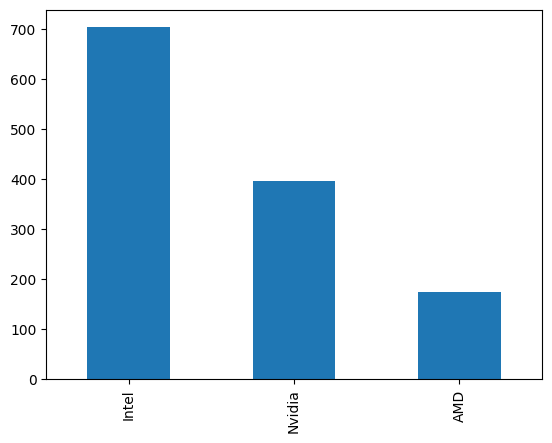

In [502]:
df['Gpu_brand'].value_counts().plot.bar()
plt.show()

- #### Intel Gpu's has a whooping high selling rate of 55.22%
- #### Nvidia Gpu has 31.10% selling rate and AMD has 13.66%

### Bivariate Analysis (Gpu_Brand - Price)

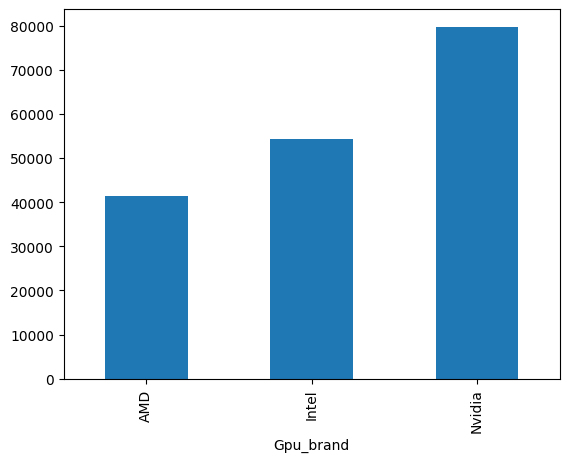

In [503]:
df.groupby('Gpu_brand')['Price'].mean().plot.bar()
plt.show()

- #### AMD gpu's has an average price of 40k but still it has the lowest selling rate i.e 13.66%
- #### Meanwhile intel gpu despite having a higher average price in range( 50k to 60k ) holds the highest selling rate of 55.22% [ one of the reasons for this can be customer trust or the quality and assurance they provide ]
- #### Nvidia gpu's goes direct into the flagship range as they an average price of 80k

### Univariate Analysis ( OpSys )

In [504]:
df['OpSys'].value_counts()/len(df)*100

Windows 10      82.246661
No OS            5.184603
Linux            4.556167
Windows 7        3.534957
Chrome OS        2.042419
macOS            1.021210
Mac OS X         0.628437
Windows 10 S     0.628437
Android          0.157109
Name: OpSys, dtype: float64

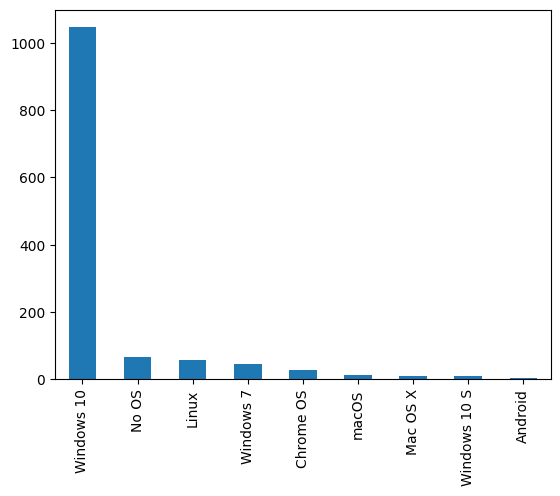

In [505]:
df['OpSys'].value_counts().plot.bar()
plt.show()

- #### Laptops with windows 10 are clearly Dominating the market with a selling rate of 82.24%

### Bivariate Analysis ( OpsSys - Price )

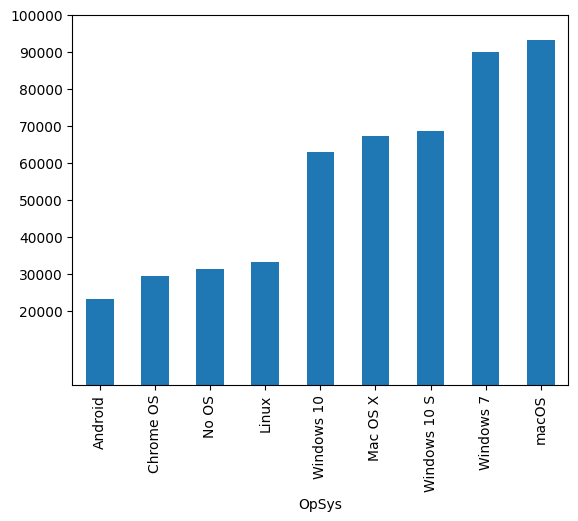

In [506]:
df.groupby('OpSys')['Price'].mean().sort_values().plot.bar()
plt.yticks(range(20000,110000,10000))
plt.show()

- #### Windows 7 Laptops with the highest selling rate have an average price of approx 92k
- #### macOS laptops are the most expensive and flagship ones with an average price of 95k

### Tranforming OpSys Column

In [507]:
def transform_opSys(value):
    if value=='Windows 10' or value=='Windows 7' or value=='Windows 10 S':
        return 'Windows'
    elif value=='macOS' or value=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

df['OpSys']=df['OpSys'].apply(transform_opSys)
df.rename(columns={'OpSys':'os'},inplace=True)

In [508]:
df['os'].value_counts()

Windows               1100
Others/No OS/Linux     152
Mac                     21
Name: os, dtype: int64

### Univariate Analysis ( Weight )

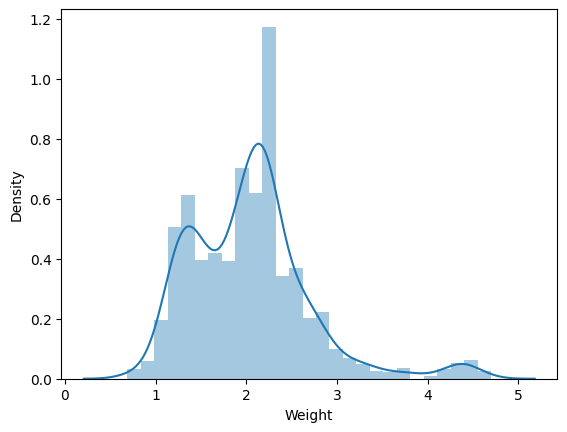

In [509]:
sns.distplot(df['Weight'])
plt.show()

- #### the distribution of weight seems fine it's just having a bimodal distribution

### Bivariate Analysis ( Weight - Price )

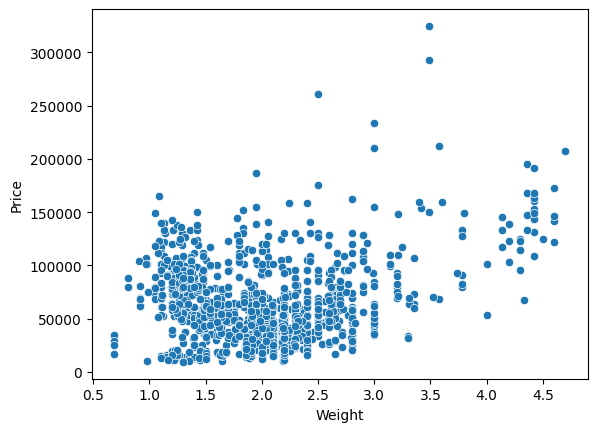

In [510]:
sns.scatterplot(data=df,x='Weight',y='Price')
plt.show()

- #### Very slight linear Relationship can be seen between increasing weight and Price

#### Checking Correlation

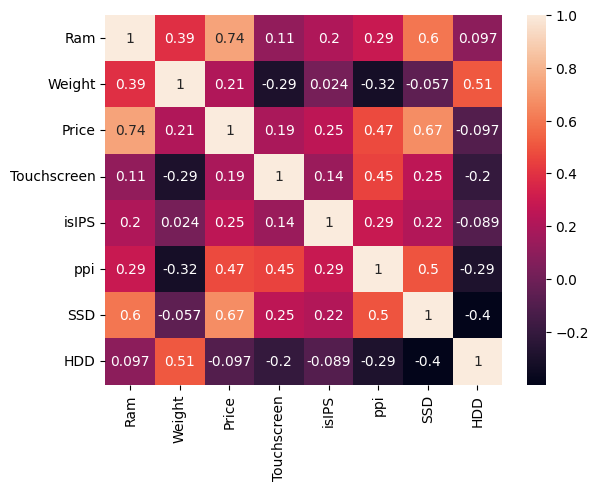

In [511]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Transforming Target column Distribution

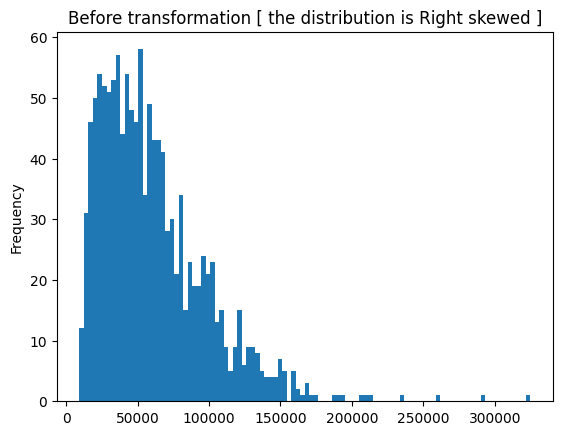

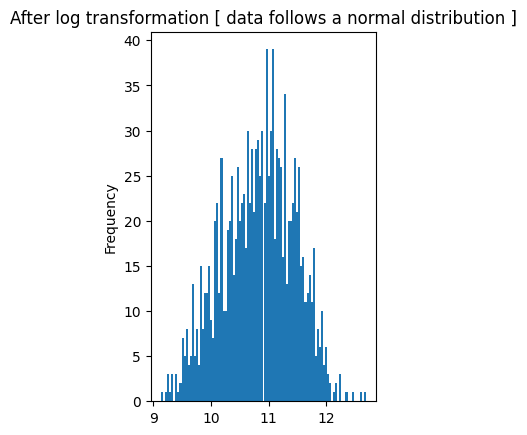

In [512]:
plt.subplot(111)
df['Price'].plot.hist(bins=100)
plt.title('Before transformation [ the distribution is Right skewed ]')
plt.show()

plt.subplot(122)

# Applying log Transformation
df['Price']=np.log(df['Price'])
df['Price'].plot.hist(bins=100)
plt.title('After log transformation [ data follows a normal distribution ]')
plt.show()

### Modelling

### Splitting the data into Independent and Dependent Variables

In [513]:
X=df.drop('Price',axis=1)
y=df['Price']

print(f"Independent columns : {len(X.columns)}\n {[i for i in X.columns]}\n\n Dependent Column : Price")

Independent columns : 12
 ['Company', 'TypeName', 'Ram', 'os', 'Weight', 'Touchscreen', 'isIPS', 'ppi', 'cpu_brand', 'SSD', 'HDD', 'Gpu_brand']

 Dependent Column : Price


### Performing Train Test Split

In [514]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.3)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(891, 12) (382, 12) (891,) (382,)


In [515]:
X_train

,Company,TypeName,Ram,os,Weight,Touchscreen,isIPS,ppi,cpu_brand,SSD,HDD,Gpu_brand
540,Dell,Ultrabook,8,Windows,1.200,1,0,276.053530,Intel Core i7,256,0,Intel
1213,Dell,2 in 1 Convertible,8,Windows,2.191,1,1,141.211998,Intel Core i5,256,0,Intel
89,Dell,Ultrabook,8,Windows,1.210,0,1,165.632118,Intel Core i7,256,0,Intel
1132,Asus,Notebook,4,Windows,1.500,0,0,111.935204,Other Intel Processor,0,0,Intel
465,Asus,Notebook,4,Windows,2.000,0,0,100.454670,Other Intel Processor,0,500,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Windows,2.200,0,0,100.454670,Intel Core i3,0,500,Nvidia
299,Asus,Ultrabook,16,Windows,1.630,0,0,141.211998,Intel Core i7,512,0,Nvidia
493,Acer,Notebook,8,Windows,2.200,0,0,100.454670,AMD Processor,0,1000,AMD
527,Lenovo,Notebook,8,Others/No OS/Linux,2.200,0,0,100.454670,Intel Core i3,0,2000,Nvidia


### Making Pipeline

In [516]:
step_1=ColumnTransformer([
    ('onehotencoder',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step_2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe=Pipeline([
    ('step_1',step_1),
    ('step2',step_2)
])

pipe.fit(X_train,y_train)
y_pred_test=pipe.predict(X_test)

#### Evaluating the Model

In [517]:
r2=r2_score(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
adj_r2 = 1 - ((1 - r2) * (len(y_test) - 1)) / (len(y_test) - len(X.columns) - 1)


print(f"R_sqaure : {r2}\nAdjusted R2 : {adj_r2}\nDifference between r2 and adjusted_r2 : {r2-adj_r2}\nMean Absolute Error : {mae}")

R_sqaure : 0.8646331647805805
Adjusted R2 : 0.8602309912775099
Difference between r2 and adjusted_r2 : 0.004402173503070594
Mean Absolute Error : 0.16794506454452723


- #### there is very less difference in r2 and adjusted r2 
- #### this shows no sign of multicollinearity that could possibly effect the model's performance
- #### Mean Absolute Error is also very low

### Dumping the pipeline

In [518]:
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(df,open("df.pkl",'wb'))

In [519]:
df

,Company,TypeName,Ram,os,Weight,Price,Touchscreen,isIPS,ppi,cpu_brand,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,11.175755,0,1,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,10.329931,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,11.814476,0,1,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,11.473101,0,1,226.983005,Intel Core i5,256,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,10.555257,0,0,100.454670,Intel Core i7,0,500,Nvidia
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,10.433899,1,1,157.350512,Intel Core i7,128,0,Intel
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,11.288115,1,1,276.053530,Intel Core i7,512,0,Intel
1272,Lenovo,Notebook,2,Windows,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel
